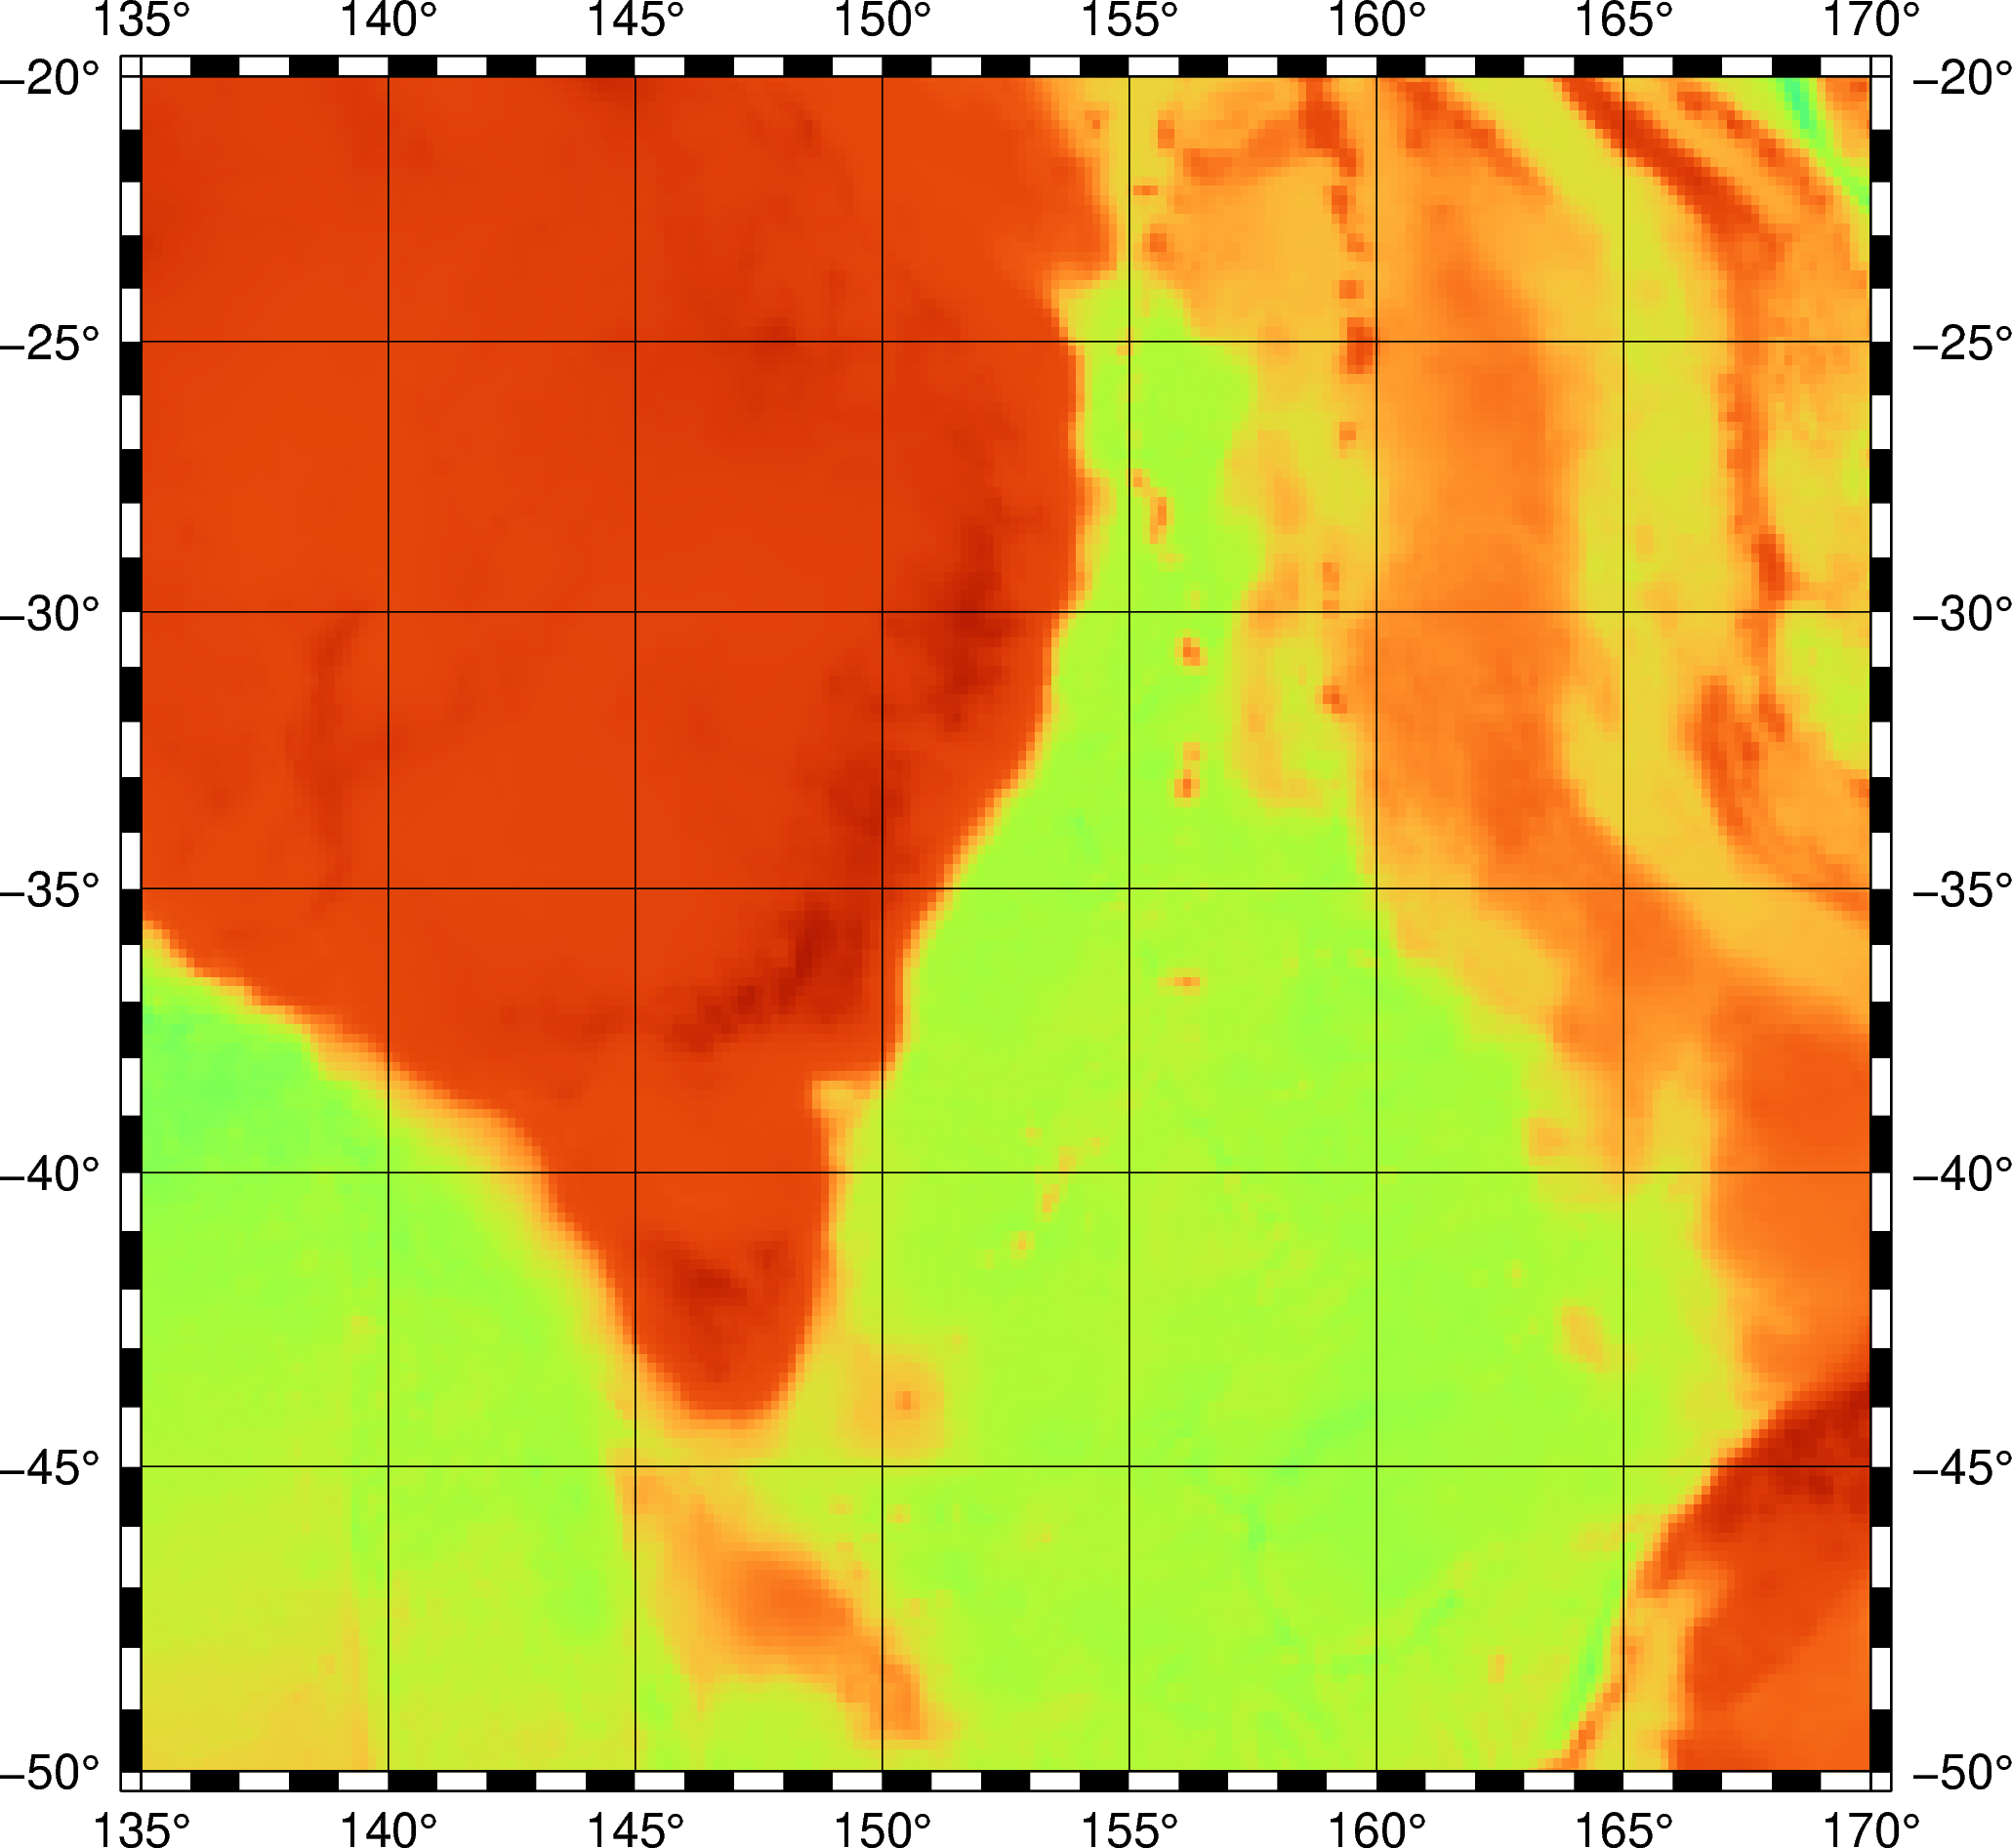

In [1]:
import pygmt
import xarray as xr

region=[135, 170, -50, -20]

fig = pygmt.Figure()

fig.grdimage(region=region, 
             projection='Cyl_stere/150/-20/15c', 
             grid='./Data/earth_relief_10m.nc', n='b')
fig.basemap(frame='afg')
fig.show(width=800)


In [2]:
pygmt.grdfilter(grid='./Data/earth_relief_10m.nc', 
                filter='m100', 
                distance='4',
                region=region,
                outgrid="filt.nc")

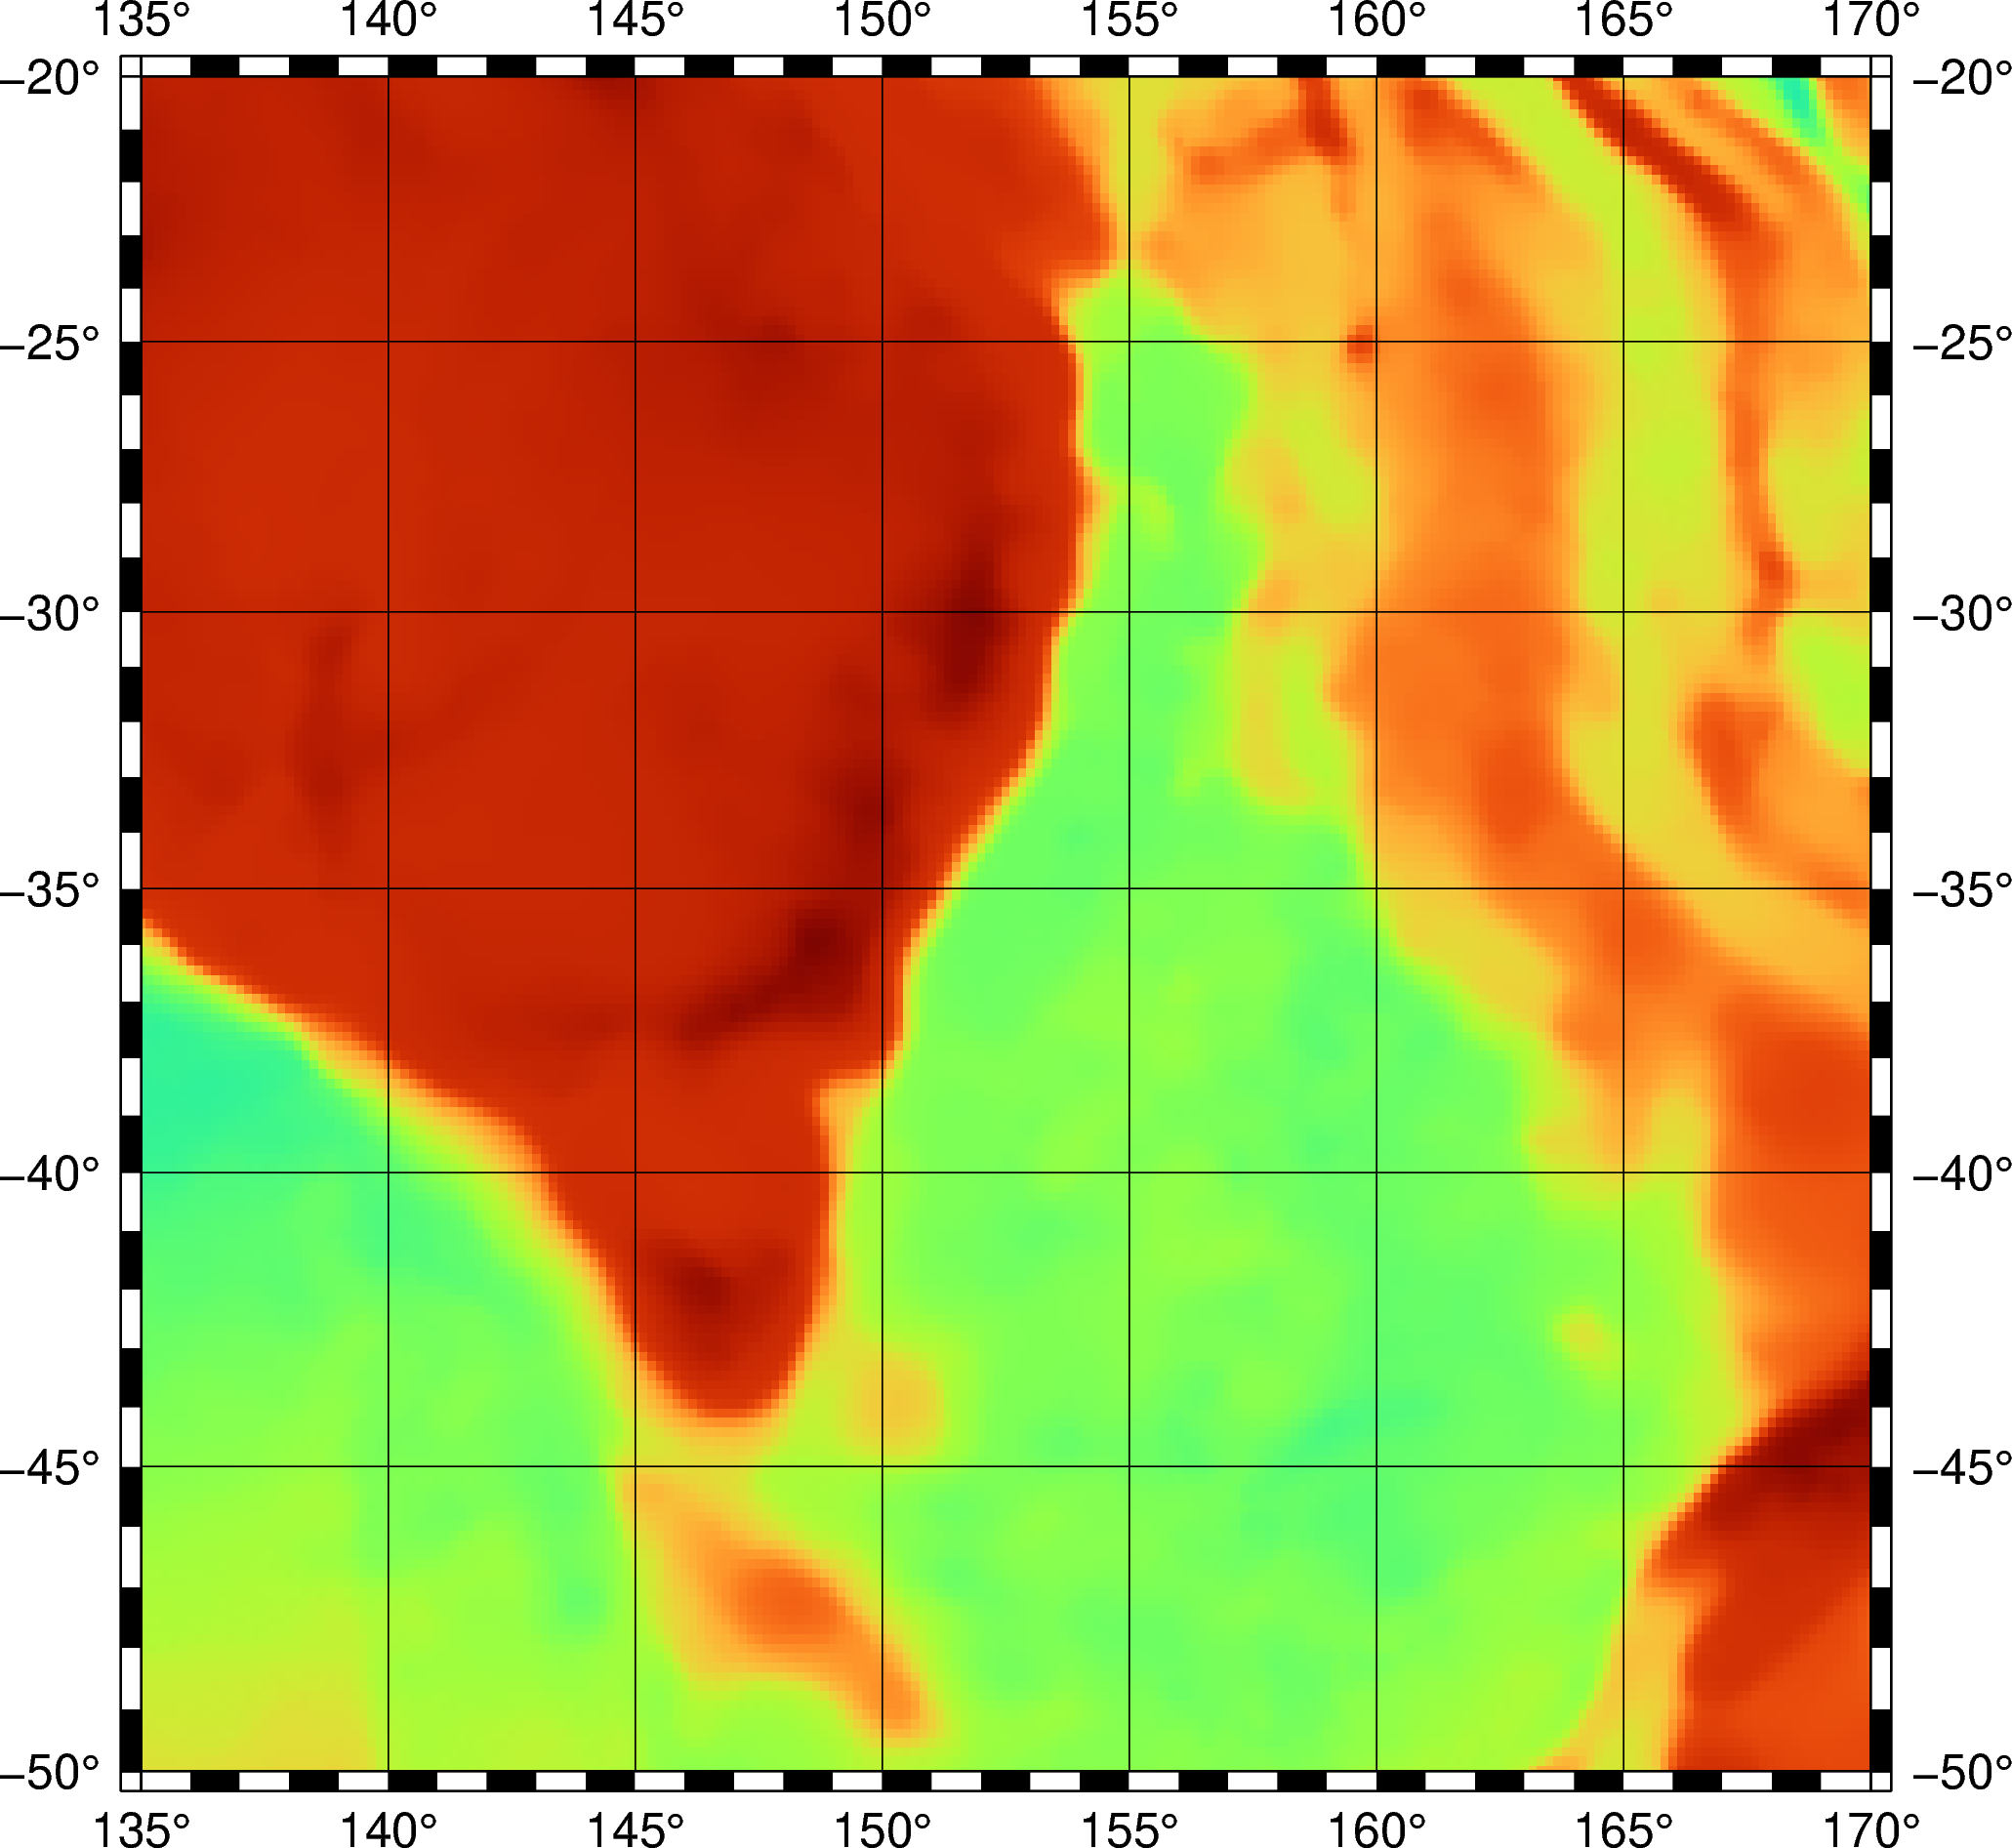

In [3]:
fig = pygmt.Figure()

fig.grdimage(region=region, 
             projection='Cyl_stere/150/-20/15c', 
             grid='filt.nc', n='b')
fig.basemap(frame='afg')
fig.show(width=1000)


In [4]:
unfiltered_grid = pygmt.grdcut('./Data/earth_relief_10m.nc', region=region)
#xr.open_dataarray('./Data/earth_relief_10m.nc')

filtered_grid = xr.open_dataarray('filt.nc')

residual_grid = unfiltered_grid - filtered_grid

residual_grid

<xarray.DataArray 'z' (lat: 181, lon: 211)>
array([[ 0.000e+00,  2.000e+00, -4.700e+01, ..., -2.000e+01, -2.300e+01,
        -1.300e+01],
       [-1.300e+01,  1.730e+02, -1.900e+01, ..., -1.000e+01, -2.200e+01,
        -1.900e+01],
       [-3.000e+00,  3.300e+01, -2.000e+01, ..., -1.500e+01,  4.000e+01,
        -1.800e+01],
       ...,
       [-1.000e+01, -1.600e+01,  0.000e+00, ...,  2.840e+02,  8.230e+02,
         0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  1.017e+03,  1.603e+03,
         6.670e+02],
       [-6.000e+00, -1.000e+00,  1.000e+00, ..., -1.370e+02,  4.600e+01,
        -3.100e+01]], dtype=float32)
Coordinates:
  * lon      (lon) float64 135.0 135.2 135.3 135.5 ... 169.5 169.7 169.8 170.0
  * lat      (lat) float64 -50.0 -49.83 -49.67 -49.5 ... -20.33 -20.17 -20.0

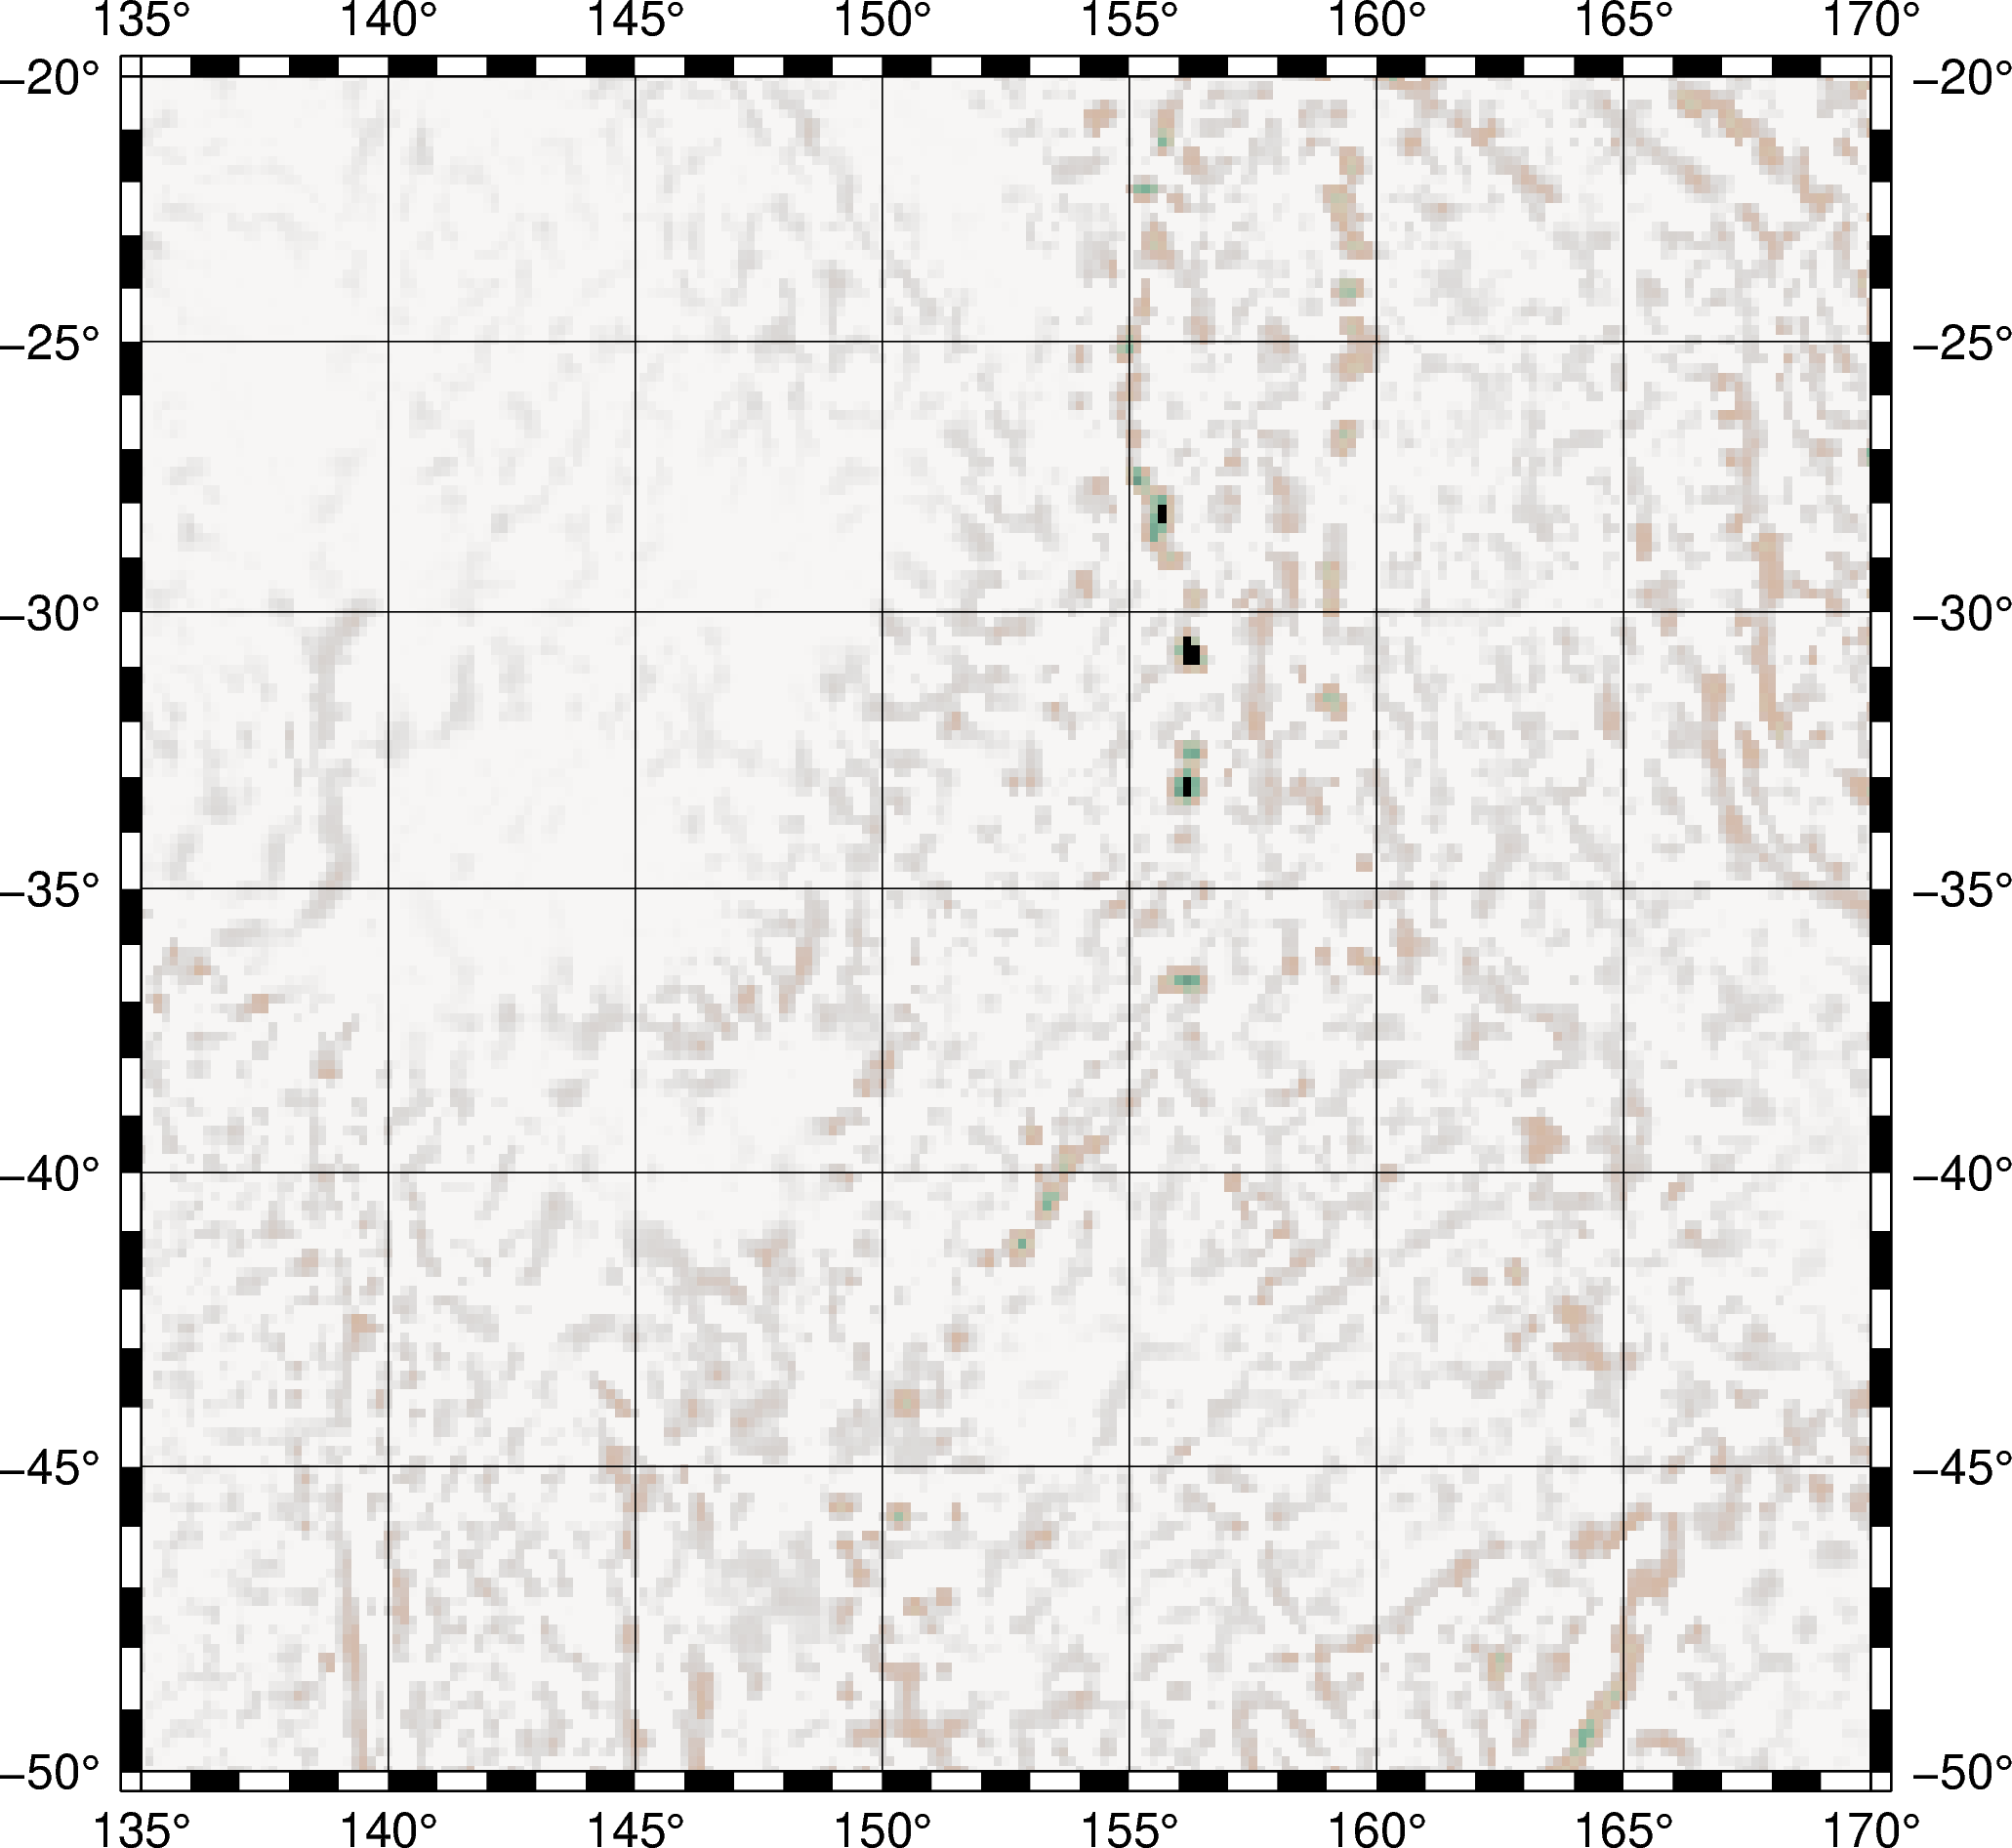

In [6]:
fig = pygmt.Figure()

pygmt.makecpt(cmap='terra', series='0/2500', reverse=True)

fig.grdimage(region=region, 
             projection='Cyl_stere/150/-20/15c', 
             grid=residual_grid, n='b')
fig.basemap(frame='afg')
fig.show(width=800)